In [1]:
import math
import numpy as np
import pandas
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

In [2]:
def loadTxt(filename):
    f = open(filename, 'r')
    lines = f.read().splitlines()
    
    data = {}
    # data[i] = {id:-1, title:'', author:[], venue:'', year:-1, abstract:'', ref:[], 'cited':0, 'dis': {}}
    # cited: how many times one is cited, how important it is.
    # dis: the shortest distance between one and all others. Currently it isn't used.
    
    newLine = True
    del(lines[0]) # remove irrelevant line, which is the total entry number.
    for v in lines:
        if (newLine):
            entry = [-1, {'id':-1, 'title':'', 'author':[], 'venue':'', 'year':-1, 'ref':[], 'abstract':'', 'cited':[], 'dis':{}}]
            newLine = False
        if (v[0:2] == '#*'):
            entry[1]['title'] = v[2:]
        elif (len(v) > 6 and v[0:6] == '#index'):
            entry[0] = int(v[6:])
            entry[1]['id'] = int(v[6:])
        elif (v[0:2] == '#@'):
            for u in v[2:].split(','):
                entry[1]['author'].append(u)
        elif (v[0:2] == '#t'):
            entry[1]['year'] = int(v[2:])
        elif (v[0:2] == '#c'):
            entry[1]['venue'] = v[2:]
        elif (v[0:2] == '#%'):
            entry[1]['ref'].append(int(v[2:]))
        elif (v[0:2] == '#!'):
            entry[1]['abstract'] = v[2:]
        else:
            if (entry[1]['abstract'] != ''): # remove
                data[entry[0]] = entry[1] 
            newLine = True

    return data

In [3]:
def stopwords(filename):
    f = open(filename, 'r')
    lines = f.read().splitlines()
    words = []
    for v in lines:
        words += v.split(',')
    return set(words)

In [4]:
def cleanData(data):
    for v in data.values():
        removed = []
        for u in v['ref']:
            if (u in data):
                data[u]['cited'].append(v['id'])
            else:
                removed.append(u)
        for u in removed:
            v['ref'].remove(u)

    return data

In [13]:
# get references
def getRef(data, paper, output):
    if (output):
        print(data[paper]['title'])
    refs = {}

    for v in data[paper]['ref']:
        if (output):
            print('-------------------------------')
            print(str(v) + ': ' + data[v]['title'])
            print('Cited: ' + str(len(data[v]['cited'])))
            print('*******************************')
        refs[v] = [u for u in [w for w in data[v]['cited'] if len(data[w]['cited'])>10] if len(data[u]['cited'])>10]
        if (output):
            for u in data[v]['cited']:
                print('        ' + str(u) + ': ' + data[u]['title'])
                print('        Cited: ' + str(len(data[u]['cited'])))

    return (paper, [v for v in data[paper]['ref'] if len(data[v]['cited'])>10], refs)

In [6]:
def plot(data, refs):

    allRef = []
    for v in refs[1]:
        allRef += refs[2][v]
    allRef = list(set(allRef))
    cord1 = {}
    cord2 = {}


    r = 10*len(refs[1])+5   #radius
    n = len(refs[1]) #points to generate
    cP = [
        [r * math.cos(theta), r * math.sin(theta)]
        for theta in (math.pi*2 * i/n for i in range(n))
    ]

    r2 = r + 10*len(allRef) + 10
    n2 = len(allRef)
    cP2 = [
        [r2 * math.cos(theta), r2 * math.sin(theta)]
        for theta in (math.pi*2 * i/n2 for i in range(n2))
    ]

    for i in range (n2):
        cord2[allRef[i]] = (cP2[i][0], cP2[i][1])
    for i in range (n):
        cord1[refs[1][i]] = (cP[i][0], cP[i][1])
    
    for i in range (n):
        cP[i].append(len(data[refs[1][i]]['cited'])+0.1)
    for i in range (n2):
        cP2[i].append(len(data[allRef[i]]['cited'])+0.1)


    fig = plt.figure()
    ax_data_plot = fig.add_subplot(111)

    ax_data_plot.scatter([0], [0], color = 'r', label='1st refs')
    plt.annotate(str(refs[0]), xy=(0,0), xycoords='data', xytext=(5, 0), textcoords='offset points')

    ax_data_plot.scatter([x[0] for x in cP], [x[1] for x in cP], color='b', label='1st refs', s=[10*x[2] for x in cP], marker='o', edgecolors='none')
    ax_data_plot.scatter([x[0] for x in cP2], [x[1] for x in cP2], color='g', label='2nd refs', s=[10*x[2] for x in cP2], marker='o', edgecolors='none')

    for i in range (n):
        plt.annotate('', xy=cord1[refs[1][i]], xycoords='data', xytext=(0, 0), textcoords='data', arrowprops={'arrowstyle':'->', 'color':'gray'})
        plt.annotate(str(refs[1][i]), xy=cord1[refs[1][i]], xycoords='data', xytext=(10*np.sign(cord1[refs[1][i]][0]), 10*np.sign(cord1[refs[1][i]][1])), textcoords='offset points')

    for v in refs[1]:
        for u in refs[2][v]:
            plt.annotate('', xy=cord1[v], xycoords='data', xytext=cord2[u], textcoords='data', arrowprops={'arrowstyle': '->', 'color':'gray'})
            plt.annotate(str(u), xy=cord2[u], xycoords='data', xytext=(10*np.sign(cord2[u][0]), 10*np.sign(cord2[u][1])), textcoords='offset points')


    plt.show()

In [7]:
dataSet = loadTxt('outputacm.txt')

In [8]:
stop = stopwords('common-english-words.txt')

In [9]:
dataSet = cleanData(dataSet)

In [10]:
testID = 628180

In [14]:
refResult = getRef(dataSet, testID, True)

Randomized active atomicity violation detection in concurrent programs
-------------------------------
45455: Velodrome: a sound and complete dynamic atomicity checker for multithreaded programs
Cited: 1
*******************************
        628180: Randomized active atomicity violation detection in concurrent programs
        Cited: 1
-------------------------------
51016: Race directed random testing of concurrent programs
Cited: 5
*******************************
        61352: CTrigger: exposing atomicity violation bugs from their hiding places
        Cited: 0
        64886: A randomized dynamic program analysis technique for detecting real deadlocks
        Cited: 0
        67412: A decision procedure for subset constraints over regular languages
        Cited: 0
        128217: State-space exploration for concurrent algorithms under weak memory orderings: (preliminary version)
        Cited: 0
        628180: Randomized active atomicity violation detection in concurrent program

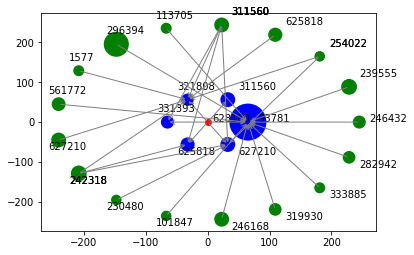

In [12]:
plot(dataSet, refResult)